In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import warnings

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv(r'C:\Users\Damian\Desktop\Data_Delhi.csv')

time - czas kiedy zostały wykonane pomiary,
tavg - średnia temperatura wyrażana w stopniach Celciusza, 
tmin - minimalna temperatura wyrażana w stopniach Celciusza,
tmax - maksymalna temperatura wyrażana w stopniach Celciusza,
prcp - opady wyrażane w milimetrach.

In [7]:
df

,time,tavg,tmin,tmax,prcp
0,01-01-1990,9.4,6.0,15.1,0.0
1,02-01-1990,9.3,5.2,14.2,0.0
2,03-01-1990,9.0,6.5,13.6,0.0
3,04-01-1990,10.7,6.0,17.5,0.0
4,05-01-1990,12.6,7.3,20.8,0.0
...,...,...,...,...,...
11889,21-07-2022,28.6,26.8,30.6,21.2
11890,22-07-2022,29.3,27.0,32.9,0.3
11891,23-07-2022,30.1,25.5,34.9,8.9
11892,24-07-2022,30.6,27.1,35.7,0.0


In [8]:
df.describe()

,tavg,tmin,tmax,prcp
count,11800.000000,10358.000000,11361.000000,5754.000000
mean,24.996415,18.877563,31.788232,3.662478
std,7.326116,7.786944,6.838998,12.473498
min,6.600000,0.100000,9.800000,0.000000
25%,18.500000,11.800000,26.700000,0.000000
50%,27.000000,20.000000,33.200000,0.000000
75%,30.900000,26.000000,36.600000,0.500000
max,39.800000,34.200000,48.100000,262.900000


In [9]:
df.isnull().sum()

time       0
tavg      94
tmin    1536
tmax     533
prcp    6140
dtype: int64

In [10]:
%%capture --no-display 
df['time'] = pd.to_datetime(df['time'],infer_datetime_format=True) #Metoda %%capture pozwala zignorować ostrzeżenia o formacie daty w poniższej linii kodu

In [11]:
df.set_index(['time'], inplace = True) #Ustawienie czasu jako index

In [12]:
df_zero = df.dropna()

In [13]:
missing_data = round((df_zero.shape[0]/df.shape[0])*100,2)

In [14]:
print(missing_data,'% danych zawiera NaN wartości') 

39.73 % danych zawiera NaN wartości


In [15]:
df[df.isna().sum(axis=1) > 3]

,tavg,tmin,tmax,prcp
time,,,,
1990-09-27,NaN,NaN,NaN,NaN
1990-09-28,NaN,NaN,NaN,NaN
1990-10-20,NaN,NaN,NaN,NaN
1990-10-21,NaN,NaN,NaN,NaN
1990-10-22,NaN,NaN,NaN,NaN
...,...,...,...,...
1999-04-30,NaN,NaN,NaN,NaN
2001-04-28,NaN,NaN,NaN,NaN
2002-10-26,NaN,NaN,NaN,NaN


94 wierszy nie posiada żadnych wartości w każdej kolumnie

In [16]:
df = df.dropna(how='all') #usunięcie wszystkich wierszy nieposiadających żadnych wartości

In [17]:
df = df.interpolate(method='time') #wykorzystanie funkcji interpolate do wypełnienia pozostałych brakujących danych, danymi szacunkowymi

In [18]:
df

,tavg,tmin,tmax,prcp
time,,,,
1990-01-01,9.4,6.0,15.1,0.0
1990-02-01,9.3,5.2,14.2,0.0
1990-03-01,9.0,6.5,13.6,0.0
1990-04-01,10.7,6.0,17.5,0.0
1990-05-01,12.6,7.3,20.8,0.0
...,...,...,...,...
2022-07-21,28.6,26.8,30.6,21.2
2022-07-22,29.3,27.0,32.9,0.3
2022-07-23,30.1,25.5,34.9,8.9


In [19]:
df.isna().sum()

tavg    0
tmin    0
tmax    0
prcp    0
dtype: int64

In [20]:
df[df['tmax'] == max(df['tmax'])] #maksymalna temperatura

,tavg,tmin,tmax,prcp
time,,,,
2017-04-06,39.8,30.4,48.1,1.0


In [21]:
df[df['tmin'] == min(df['tmin'])] #minimalna temperatura

,tavg,tmin,tmax,prcp
time,,,,
2003-07-06,36.6,0.1,42.2,0.0


In [22]:
df[df['prcp'] == max(df['prcp'])] #maksymalne opady

,tavg,tmin,tmax,prcp
time,,,,
1996-04-07,30.6,24.666667,37.1,262.9


array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

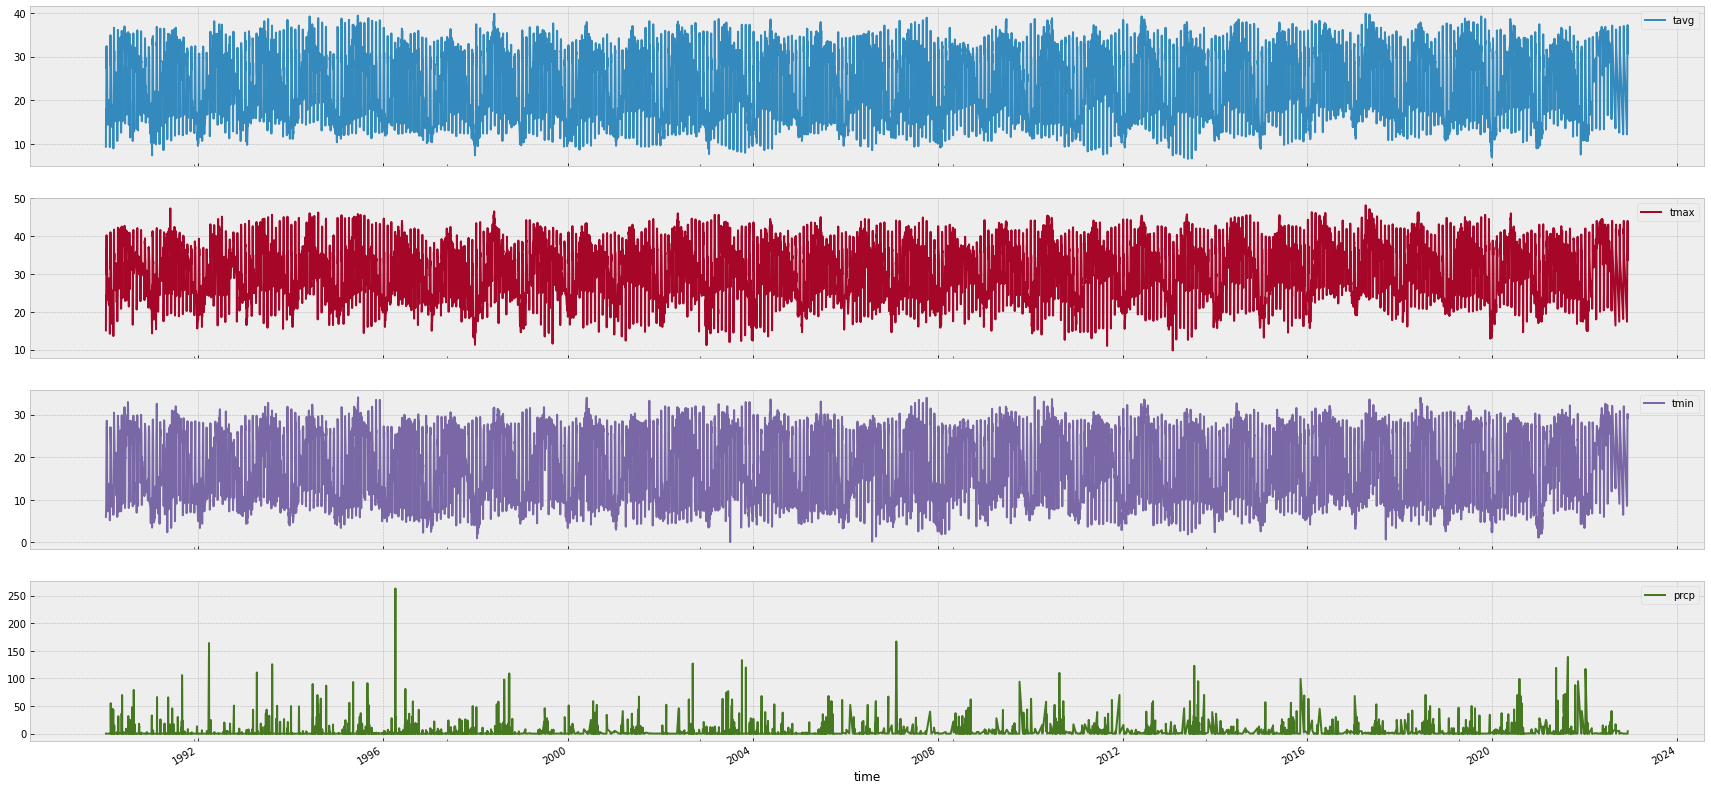

In [23]:
plt.style.use('bmh')
df[['tavg', 'tmax', 'tmin', 'prcp']].plot(subplots=True, figsize=(30,15))

In [24]:
df_years = df.groupby(df.index.year).mean()
df_years

,tavg,tmin,tmax,prcp
time,,,,
1990,24.755587,19.171572,31.125024,2.193171
1991,24.778933,18.833806,31.525796,1.752107
1992,24.065273,17.474069,30.730890,2.350364
1993,24.824242,18.815886,31.517906,2.644628
1994,24.693906,18.455956,31.367036,2.815028
1995,24.965659,19.193269,31.273077,2.321291
1996,24.320765,18.228962,31.102459,3.292350
1997,23.587123,18.048219,29.647123,1.368630
1998,24.534521,18.900137,30.908767,2.440822


Text(0.5, 1.0, 'Średnie dzienne opady na przestrzeni lat')

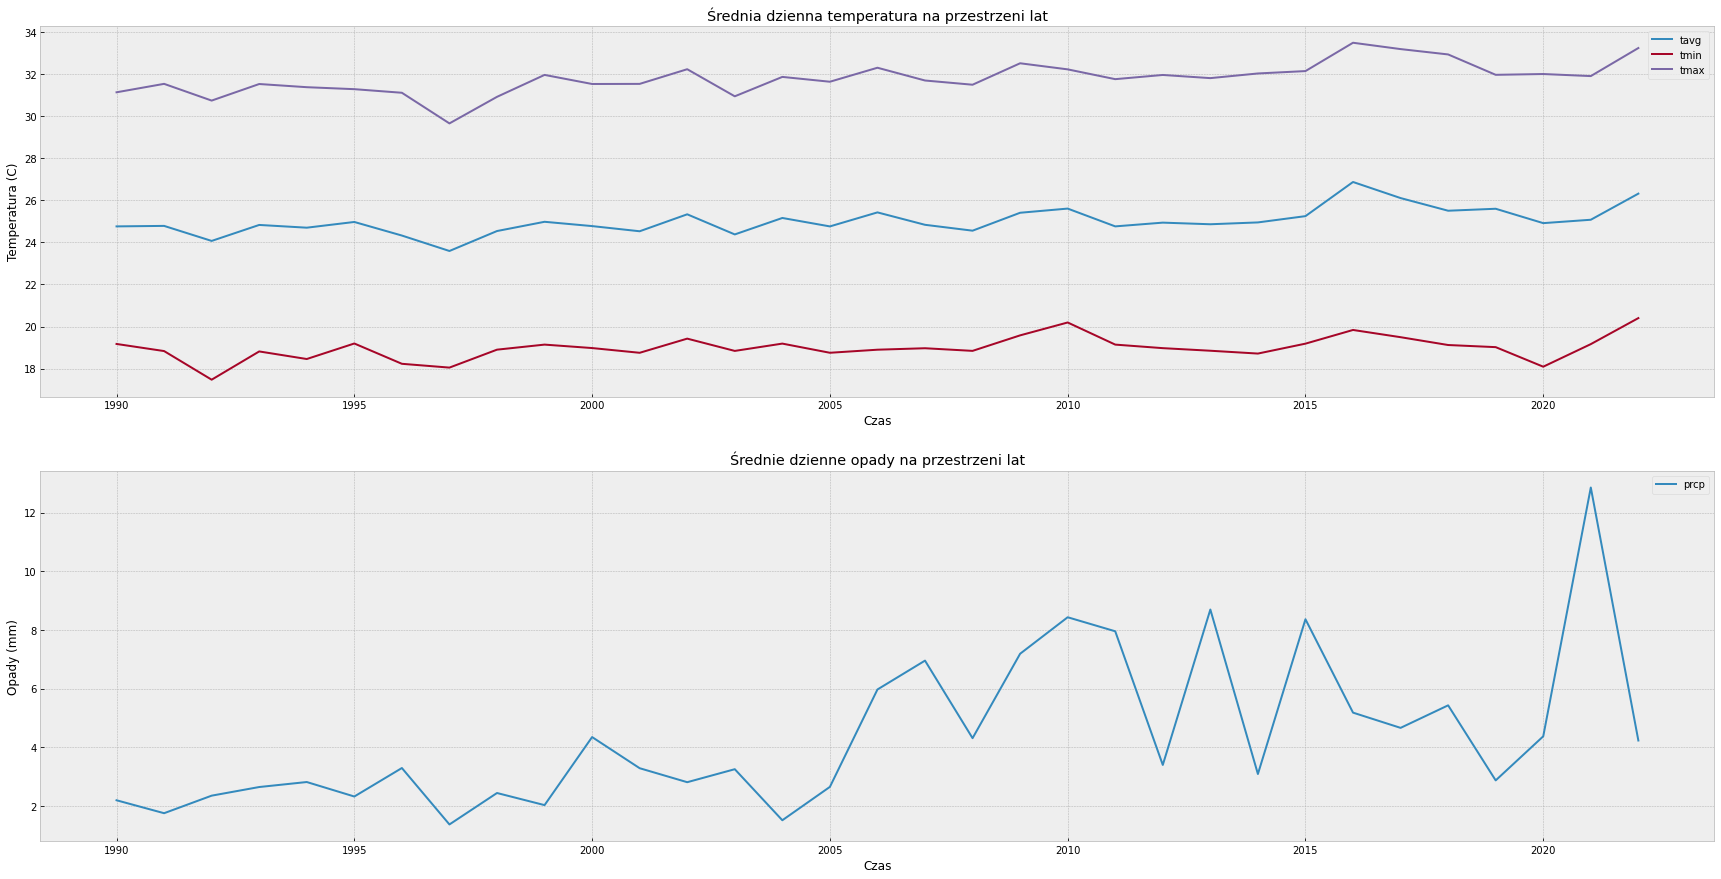

In [25]:
f, axes = plt.subplots(nrows=2, figsize=(30,15))
ax = df_years[['tavg', 'tmin', 'tmax']].plot(ax=axes[0])
ax.set_ylabel('Temperatura (C)')
ax.set_xlabel('Czas')
ax.set_title('Średnia dzienna temperatura na przestrzeni lat')

ax = df_years[['prcp']].plot(ax=axes[1])
ax.set_ylabel('Opady (mm)')
ax.set_xlabel('Czas')
ax.set_title('Średnie dzienne opady na przestrzeni lat')

Z wykresu średniej rocznej temperatury zauważyć można nieznaczne wachania temperatury od 1990 roku z niewielką tendencją wzrostową po roku 2020

Średnie roczne opady od roku 1990 do roku 2005 wachały sie między 2-4mm. Po roku 2005 można zauważyć dynamiczny wzrost ilości opadów, mieszący się w przedziale 4-8mm do roku 2020, po którym nastąpił gwałtowny wzrost średniej ilości opadów.

Text(0.5, 1.0, 'Średnie miesięczne opady')

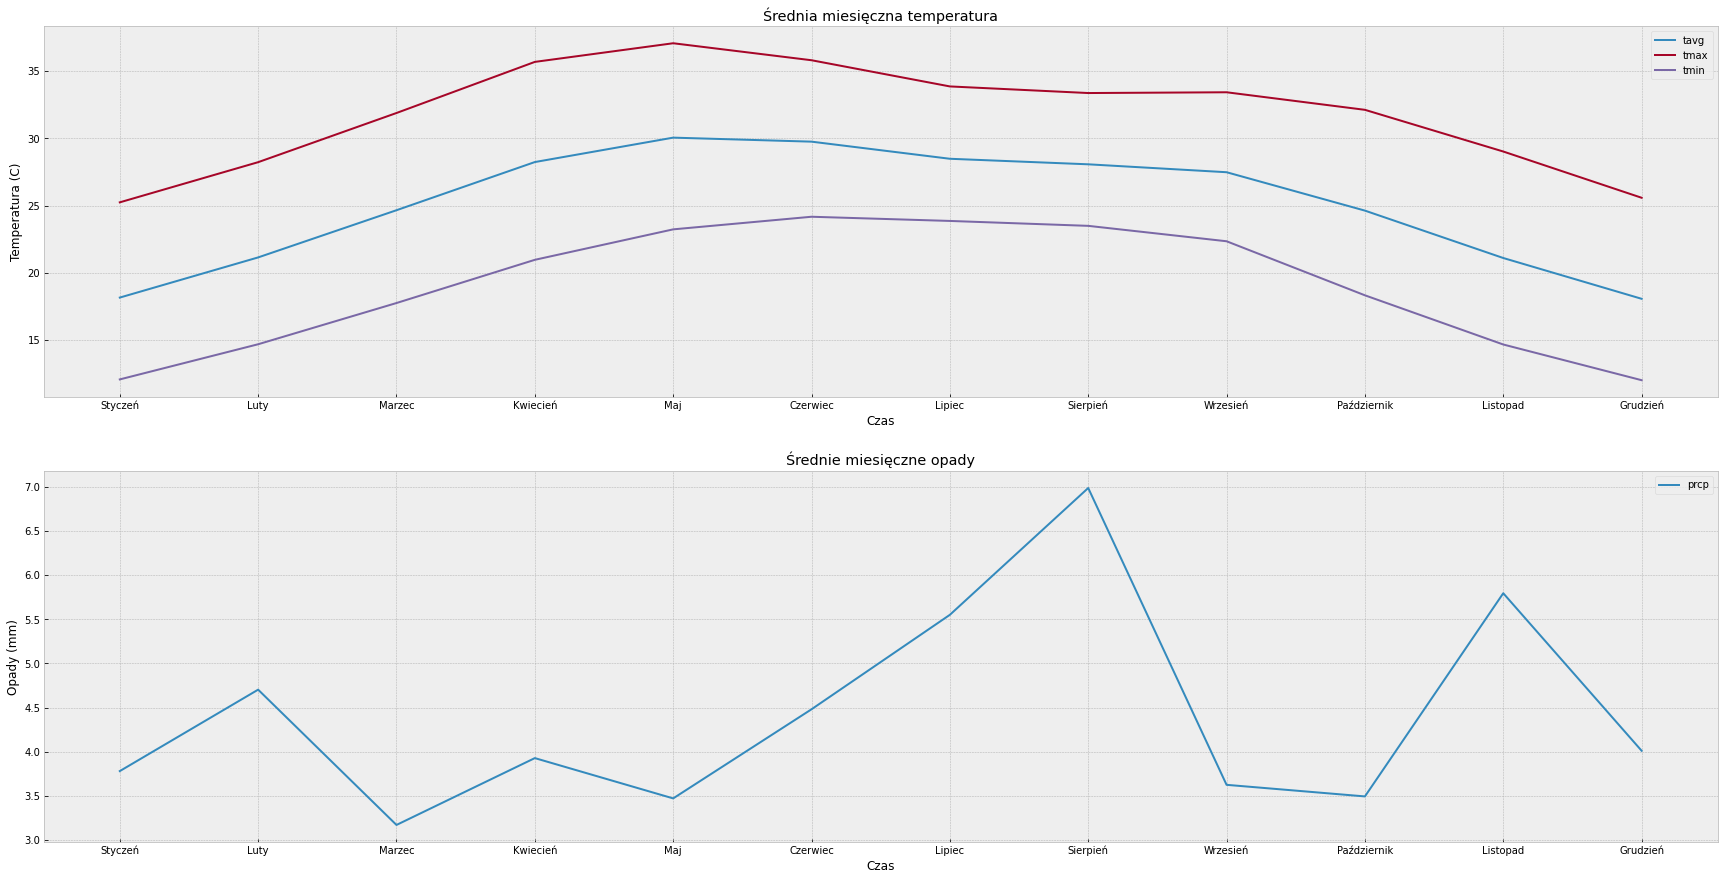

In [26]:
months=['Styczeń','Luty','Marzec','Kwiecień','Maj','Czerwiec','Lipiec','Sierpień','Wrzesień','Październik','Listopad','Grudzień'] #wizualizacja danych z podziałem na miesiące

df_months = df.groupby(df.index.month, as_index=False)[['tavg','tmin','tmax','prcp']].mean()

f, axes = plt.subplots(nrows=2, figsize=(30,15))
ax = df_months[['tavg','tmax','tmin']].plot(ax=axes[0])
ax.set_ylabel('Temperatura (C)')
ax.set_xlabel('Czas')
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(months)
ax.set_title('Średnia miesięczna temperatura')
                                            
ax = df_months[['prcp']].plot(ax=axes[1])
ax.set_ylabel('Opady (mm)')
ax.set_xlabel('Czas')
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(months)
ax.set_title('Średnie miesięczne opady')                  

In [27]:
df['year'] = df.index.year
df['month'] = df.index.month

In [28]:
heatmap = df.groupby(['year','month'], as_index=False)[['tavg','prcp']].mean()

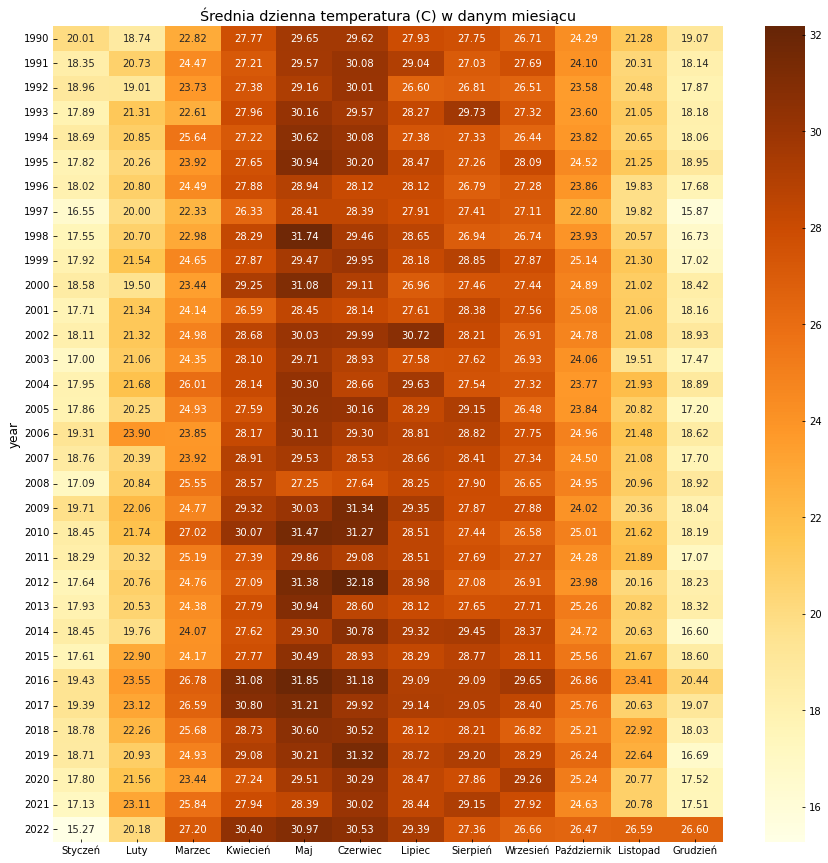

In [29]:
data = heatmap.pivot('year','month','tavg')
data.columns = months

plt.subplots(figsize=(15,15))
sns.heatmap(data, cmap='YlOrBr', annot=True, fmt='.2f')
plt.title('Średnia dzienna temperatura (C) w danym miesiącu')
plt.yticks='auto'
plt.show()


Najwyższe średnie dzienne temperatury odnotowane zostały w miesiącach maj oraz czerwiec, natomiast najniższe w miesiącach grudzień oraz styczeń